### SVM Kernels

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)

In [30]:
x = np.hstack([x, -x])
y = np.hstack([y, -y])

In [31]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)

In [32]:
x1 = np.hstack([x1, -x1])
y1 = np.hstack([y1, -y1])

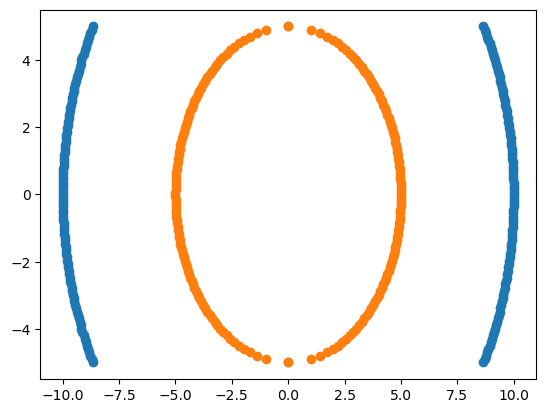

In [33]:
plt.scatter(y, x)
plt.scatter(y1, x1)

In [34]:
import pandas as pd
df1 = pd.DataFrame(np.vstack([y,x]).T, columns=['X1' , 'X2'])
df1['Y'] = 0
df1

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0
...,...,...,...
195,-8.881281,-4.59596,0
196,-8.828277,-4.69697,0
197,-8.773790,-4.79798,0
198,-8.717792,-4.89899,0


In [35]:
df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns=['X1', 'X2'])
df2['Y'] = 1

In [36]:
df = df1.append(df2)
df

/tmp/ipykernel_729/1036306247.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0
...,...,...,...
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1


### Polynomial Kernel
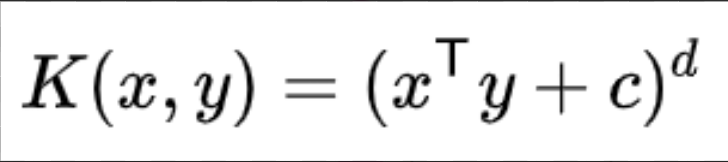

# Based on the formula find the componenets for the Polynomial kernel

In [37]:
df['X1_Square'] = df['X1']**2
df['X2_Square'] = df['X2']**2
df['X1*X2'] = df['X1']*df['X2']
df

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009
...,...,...,...,...,...,...
195,-1.969049,-4.59596,1,3.877155,21.122845,9.049671
196,-1.714198,-4.69697,1,2.938476,22.061524,8.051537
197,-1.406908,-4.79798,1,1.979390,23.020610,6.750316
198,-0.999949,-4.89899,1,0.999898,24.000102,4.898740


In [38]:
# Independent and Dependent Features
X = df[['X1_Square', 'X2_Square', 'X1*X2']]
y = df['Y']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [40]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


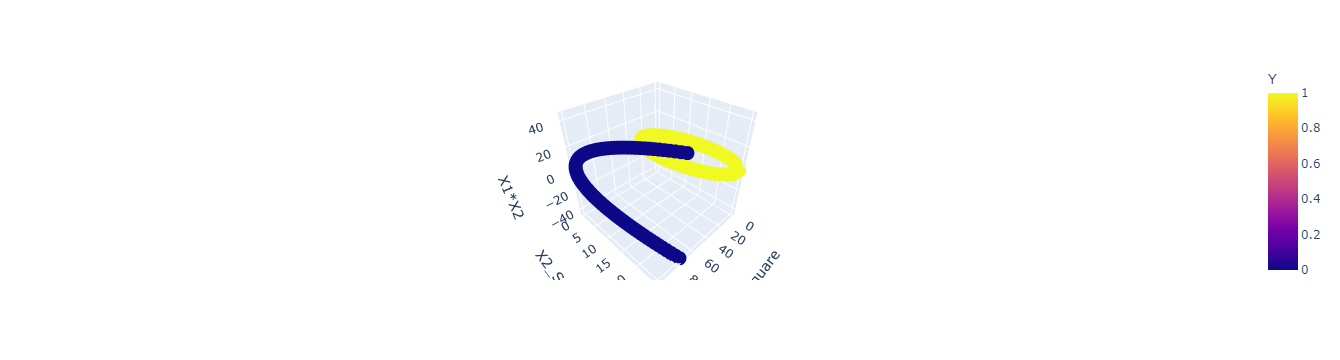

In [41]:
import plotly.express as px
fig = px.scatter_3d(df, x = 'X1_Square', y='X2_Square', z = 'X1*X2', color='Y')
plt
fig.show()
plt.show()

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

## Radial Basis Function Kernel
![image.png](attachment:2350c8c5-a535-4822-9953-16e0df479498.png)

In [43]:
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [50]:
## Independent Features
X = df.iloc[:,0:2]
y = df.Y

In [51]:
X,y

(           X1       X2
 0    8.660254 -5.00000
 1    8.717792 -4.89899
 2    8.773790 -4.79798
 3    8.828277 -4.69697
 4    8.881281 -4.59596
 ..        ...      ...
 195 -1.969049 -4.59596
 196 -1.714198 -4.69697
 197 -1.406908 -4.79798
 198 -0.999949 -4.89899
 199 -0.000000 -5.00000
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 195    1
 196    1
 197    1
 198    1
 199    1
 Name: Y, Length: 400, dtype: int64)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [53]:
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred)

1.0

### Polynomial Kernel

In [55]:
classifier = SVC(kernel='poly')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.69

### Sigmoid Kernel

In [56]:
classifier = SVC(kernel='sigmoid')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.56